In [1]:
import pandas as pd
from numpy import exp
from numpy import linalg
import numpy as np
import math 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

In [65]:
#inizializzo la griglia
x_up = 10
x_down = 0
x_0 = 5
c_f = 0.5
a = 1
T=0.5
Nx=251
dx = (x_up - x_down)/(Nx - 1)
x = np.linspace(x_down, x_up, Nx)

#dato iniziale
u_0 = 10*exp(-(x-x_0)**2)

dt = c_f * dx / (linalg.norm(u_0))
Nt = math.ceil(T/dt) + 1

#inizializzo la soluzione
U_cons = np.zeros([Nx, Nt])
U_non_cons = np.zeros([Nx, Nt])
U_cons[:,0] = u_0
U_non_cons[:,0] = u_0

In [66]:
print(Nt)

1401


In [67]:
#####APPLICO UPWIND IN FORMA CONSERVATIVA

for n in range (Nt-1):
    #condizioni al contorno periodiche
    U_cons[0,n+1] = U_cons[0,n] - dt/dx * (1/2 * (U_cons[0,n]**2) - 1/2 * (U_cons[Nx-2, n])**2)
    
    #corpo
    U_cons[1:Nx, n+1] = U_cons[1:Nx,n] - dt/dx * (1/2 * (U_cons[1:Nx,n]**2) - 1/2 * (U_cons[0:Nx-1, n])**2)

In [70]:
#####APPLICO UPWIND IN FORMA NON CONSERVATIVA

for n in range (Nt-1):
    #condizioni al contorno periodiche
    U_non_cons[0,n+1] = U_non_cons[0,n] - (dt/dx * U_non_cons[0,n]) * (U_non_cons[0,n] - U_non_cons[Nx-2, n])
    
    #corpo
    U_non_cons[1:Nx, n+1] = U_non_cons[1:Nx,n] - (dt/dx * U_non_cons[1:Nx, n+1]) * (U_non_cons[1:Nx,n] - U_non_cons[0:Nx-1, n])

In [72]:
for i in range (Nt):
    plt.plot(x,U_cons[:,i], label = 'upwind \nconservative \nform')
    plt.plot(x, U_non_cons[:,i], label = 'upwind \nnon conservative \nform')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('t = ' + str((i*0.5)/1401) + 's')
    plt.legend(loc = 'upper left')
    plt.ylim(0,10.1)
    plt.savefig('_'+str(i)+'_.png')
    plt.close()

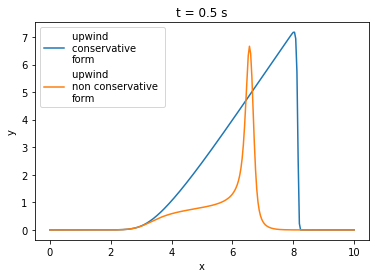

In [71]:
plt.plot(x,U_cons[:,Nt-1], label = 'upwind \nconservative \nform')
plt.plot(x, U_non_cons[:,Nt-1], label = 'upwind \nnon conservative \nform')
plt.xlabel('x')
plt.ylabel('y')
plt.title('t = 0.5 s')
plt.legend(loc = 'upper left')
#plt.ylim(0,10.1)
plt.savefig('situazione_finale_251punti.png')